# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [65]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [66]:
def mean(lst):
    return sum(lst)/len(lst)


class Model_first:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        self.deal_price = []
        self.last_price = 0


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()
            self.last_price = (self.sellers[seller_id].expect_price + self.consumers[consumer_id].expect_price)/2
            self.deal_price.append(self.last_price)

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()
            self.deal_price.append(self.last_price)

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end, name = ""):
        fig = plt.figure(figsize=(20, 5))
        fig.suptitle(name)
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def price_plot(self, start, finish, name = ""):
        steps_range = list(range(start, finish + 1))
        deals_price = []

        for k in range(start, finish + 1):
            deals_price.append(self.deal_price[k])
        
        plt.figure(figsize=(10, 6))
        plt.suptitle(name)
        plt.plot(steps_range, deals_price)
        plt.xlabel('Шаг')
        plt.ylabel('Цена сделки')
        plt.title('График цены сделок')
        plt.show()

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(self.consumers[consumer_id].max_price), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(self.sellers[seller_id].min_price), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [67]:
random.seed(42)
model = Model_first(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=1,
              seller_max=2,
              seller_delta=0.5)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 8043.19it/s]


## Визуализация модели

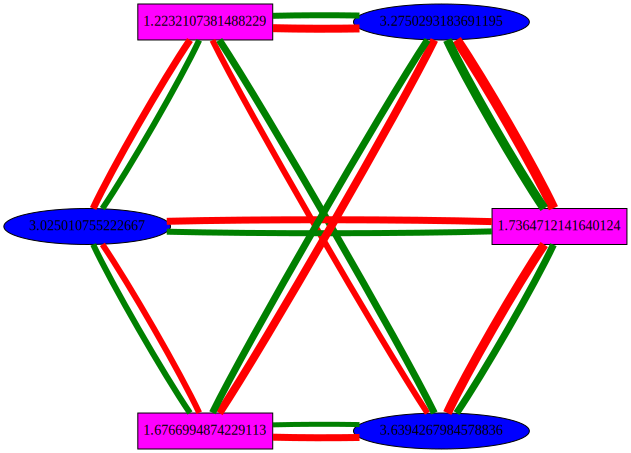

In [68]:
model.plot_graph(0, 1000)

## Результаты моделирования

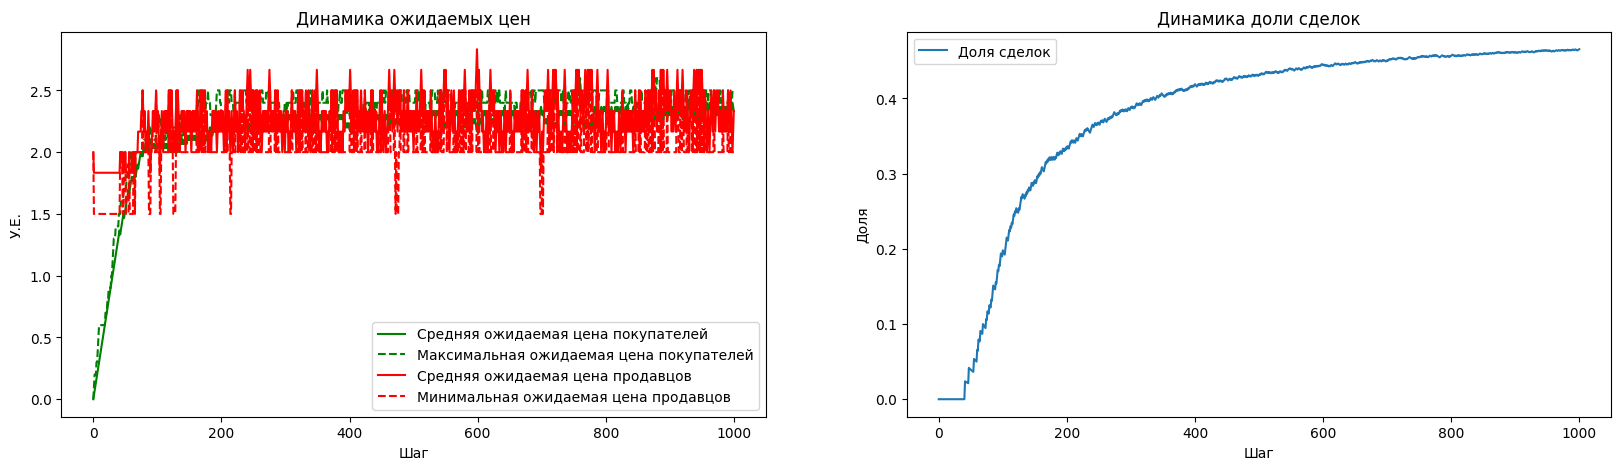

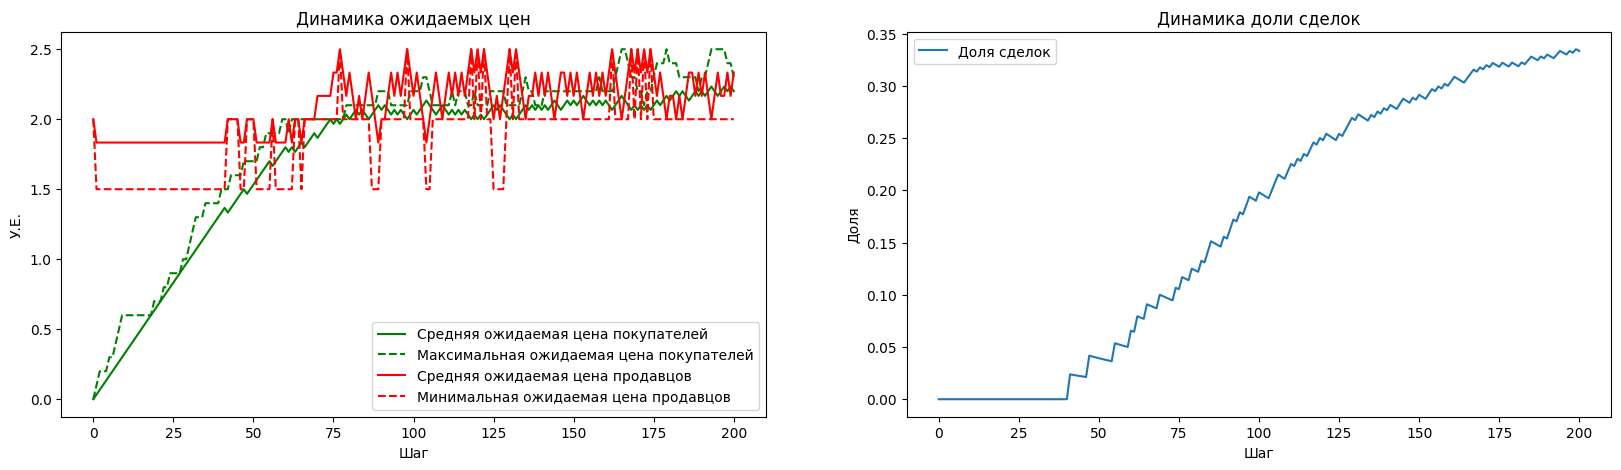

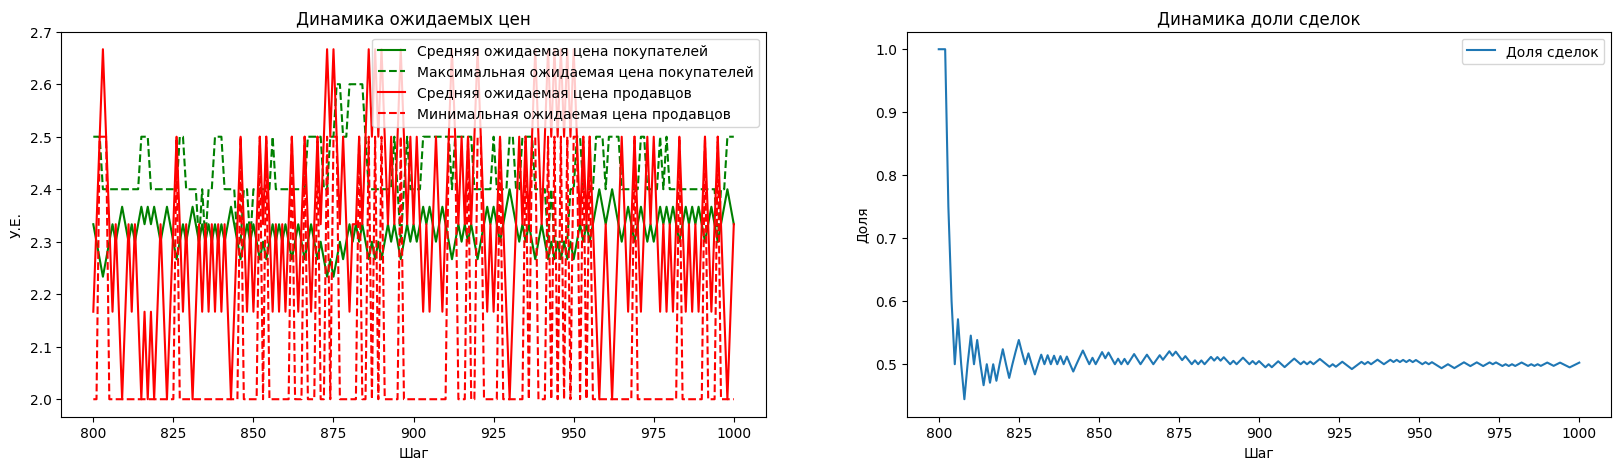

In [69]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

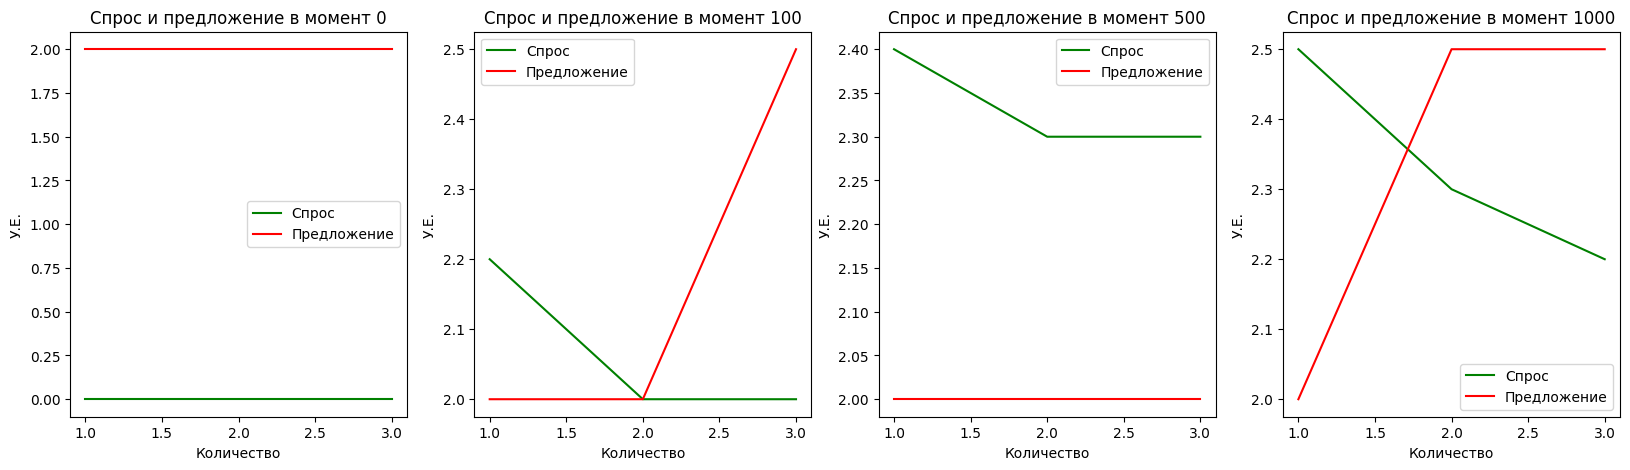

In [70]:


model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

**ОТВЕТ:**
Если диапазоны цен не пересекаются и у продавцов этот диапазон находится ниже, чем у покупателей, то все могут договориться друг с другом, то есть ожидаемые цены агентов двигаются навстречу друг другу. Будет достигнуто некое равновесие, но так как после кажой удачной сделки будет происходить "отскок", то в следующий раз эти же покупатель и продавец не согласятся на сделку. То есть будет примерно половина удачных сделок, что и отображает модель.

Если диапазоны цен сильно пересекаются, то найдутся пары, которые не смогут договориться вообще, что сильно снижает процент удачных сделок. (Он становится ниже 0.5, но при очень-очень больших значених он всё же приближается к 0,5).  Можно также увидеть это на диаграмме связей (ставится больше красных и меньше зелёных связей).

Если же диапазоны цен не пересекаются и у продавцов этот диапазон находится выше, чем у покупателей, то сделки вообще не осуществляются, так как не найдутся пары, которые смогут договориться.

Можно сделать выводы, что доля сделок стремится к 0,5. (При условии, что покпуатели и продавцы могут договориться)

Что касается ожидаемых цен, то если диапазоны цен не пересекаются и у продавцов этот диапазон находится ниже, чем у покупателей (то есть все могут договориться друг с другом), то цена стремится к сумме максимальной цены продавца на рынке и средней дельтой между продавцом и покупателем. При этом диапазон цен принимает значение от (разности этой "равновесной цены" и дельты продавцов) до (суммы "равновесной цены" и дельты покупателей).

Скорость сходимости зависит от числа игроков на рынке и от значения дельт: чем больше игроков, тем им сложнее договорится (больше действий требуется для усреднения цены), то есть, чем больше игроков, тем скорость сходимости меньше, а вот рост дельт увеличиваает скорость сходимости, так как становится больше шаг приближения к "равновесию".

График связей со временем зависит от первоначальных диапазонов покупателей и продавцов: если они сильно пересекаются, то появляется множество пар, которые вовсе не могут договоритися, что приводит к увеличению красных связей, означающих число неудачных сделок. Если же диапазоны цен не пересекаются и у продавцов этот диапазон находится ниже, чем у покупателей (то есть все могут договориться друг с другом), то количество зеленых и красных связей становится практически одинаковым (красные связи появляются в основном из-за отскоков после удачных сделок). Если диапазон у продацов выше, чем у покупателей, то сделок на рыке не происходит, что и показывает диаграмма, выдавая все красные связи.

Проанализируем последние графики, которые показывают спрос и предложение в разные моменты времени. Первоначально никаких сделок не было, так как цены покупателей находятся в 0, а цены продавцов - в максимуме. Далее цены постепенно у продавцов начинают снижаться, а у покупателей - расти, что и ведёт к увеличению количеству сделок и изменениям графиков спроса и предложения (больше покупателей становятля всё более лояльными и снижают цену, то есть они могут купить больше по более высокой цене).






## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [71]:



def mean(lst):
    return sum(lst) / len(lst)


class Model_2:
    def __init__(self, consumer_groups, seller_groups):

        # количество групп покупателей
        self.consumer_groups = consumer_groups
        self.num_of_consumer_groups = len(consumer_groups)


        # количество групп продавцов
        self.seller_groups = seller_groups
        self.num_of_seller_groups = len(seller_groups)

        self.num_of_consumers = 0
        self.num_of_sellers = 0

        self.consumers = []
        self.sellers = []

        # список всех покупателей
        for group in consumer_groups:
            #consumer_group = []
            num_of_consumers_per_group = group['num_of_consumers_per_group']
            consumer_min = group['consumer_min']
            consumer_max = group['consumer_max']
            consumer_delta = group['consumer_delta']
            self.num_of_consumers += num_of_consumers_per_group
            self.consumers.extend([Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers_per_group)])

            #for _ in range(num_of_consumers_per_group):
                #consumer_group.append(Consumer(consumer_min, consumer_max, consumer_delta))
            #self.consumers.append(consumer_group)

        # список всех продавцов
        for group_params in seller_groups:
            #seller_group = []
            num_of_sellers_per_group = group_params['num_of_sellers_per_group']
            seller_min = group_params['seller_min']
            seller_max = group_params['seller_max']
            seller_delta = group_params['seller_delta']
            self.num_of_sellers += num_of_sellers_per_group
            self.sellers.extend([Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers_per_group)])

            #for _ in range(num_of_sellers_per_group):
                #seller_group.append(Seller(seller_min, seller_max, seller_delta))
            #self.sellers.append(seller_group)

        self.consumers_expect_price = []
        self.sellers_expect_price = []
        self.deals_results = []

    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 1
            })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 0
            })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps + 1):  # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)

    def plot_dynamics(self, start, end, name = ""):
        fig = plt.figure(figsize=(20, 5))
        fig.suptitle(name)

        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # Список точек по оси шагов
        steps_range = list(range(start, end + 1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start: end + 1])), color='g',
                 label="Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start: end + 1])), color='g', linestyle='--',
                 label="Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start: end + 1])), color='r',
                 label="Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start: end + 1])), color='r', linestyle='--',
                 label="Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end + 1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")


    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(self.consumers[consumer_id].max_price), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(self.sellers[seller_id].min_price), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph

class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


# Пример использования

consumer_groups = [
    {'num_of_consumers_per_group': 3, 'consumer_min': 3, 'consumer_max': 4, 'consumer_delta': 0.1},
    {'num_of_consumers_per_group': 3, 'consumer_min': 2, 'consumer_max': 5, 'consumer_delta': 0}
]

seller_groups = [
    {'num_of_sellers_per_group': 3, 'seller_min': 3, 'seller_max': 4, 'seller_delta': 0},
    {'num_of_sellers_per_group': 3, 'seller_min': 1, 'seller_max': 2, 'seller_delta': 0.1},
    
]



model_2 = Model_2(consumer_groups, seller_groups)
model_2.run(2000)


100%|██████████| 2001/2001 [00:00<00:00, 164597.02it/s]


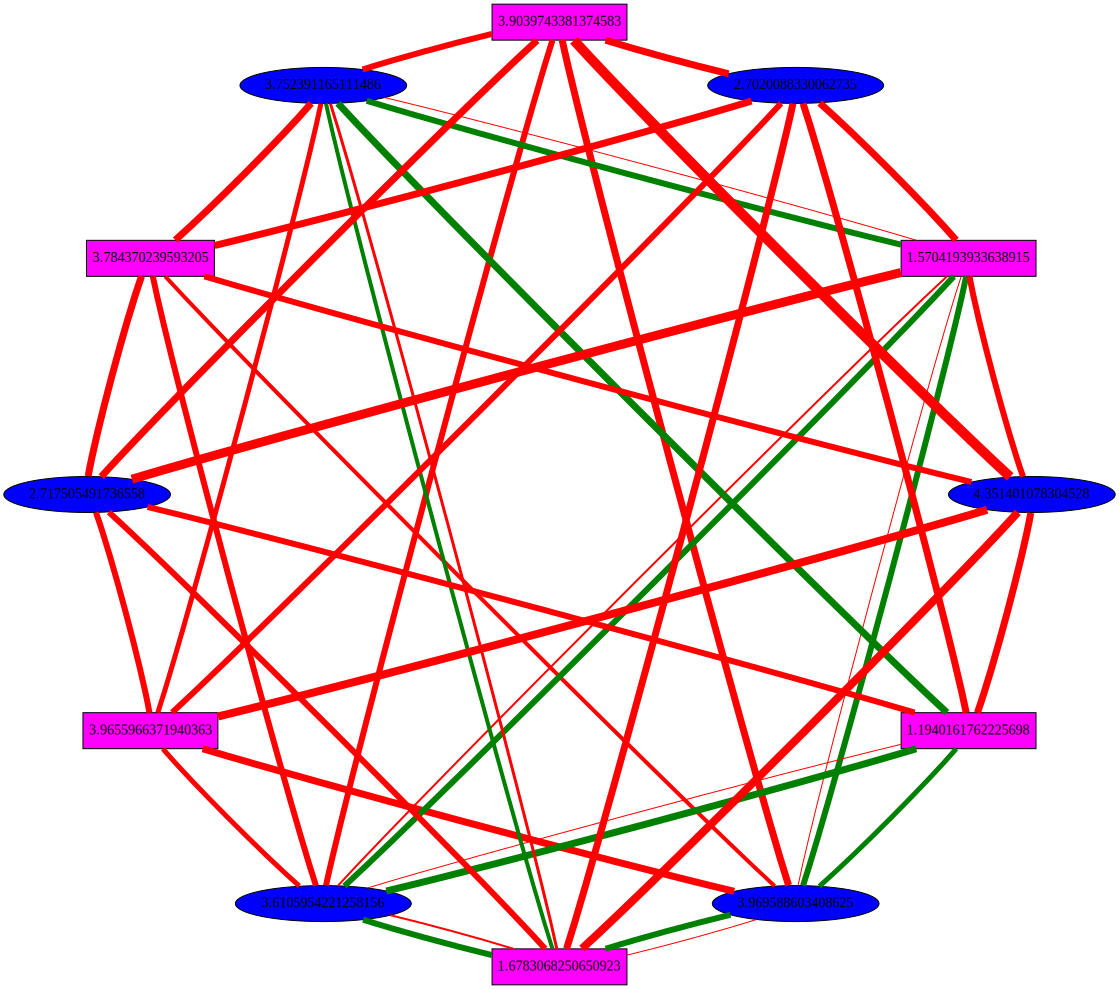

In [72]:
model_2.plot_graph(0, 1000)

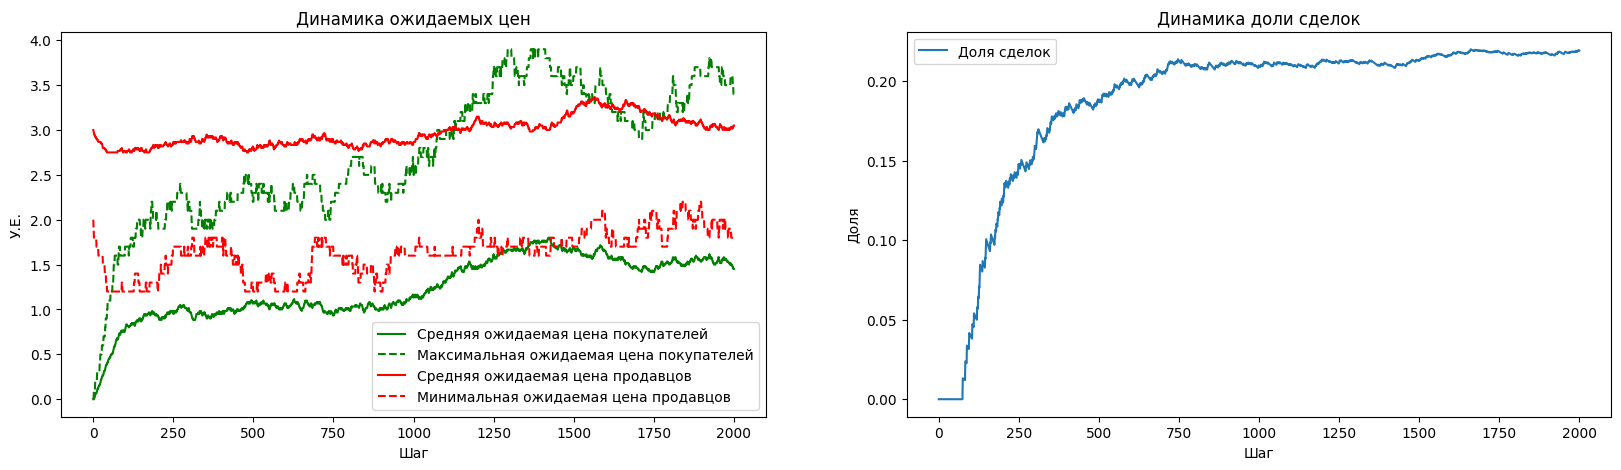

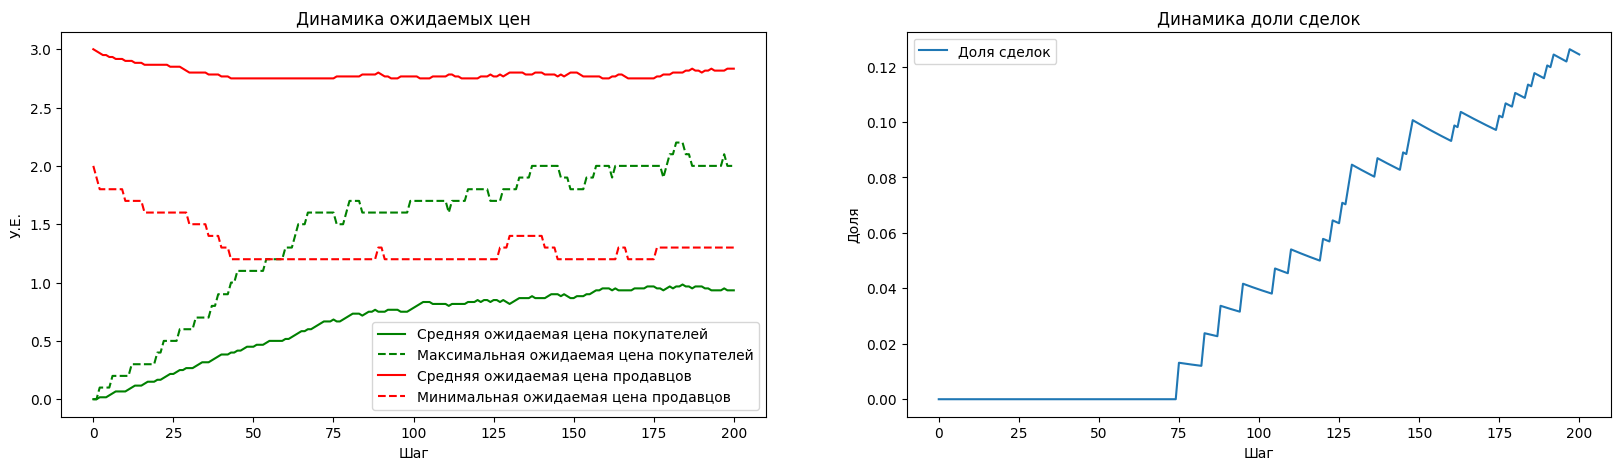

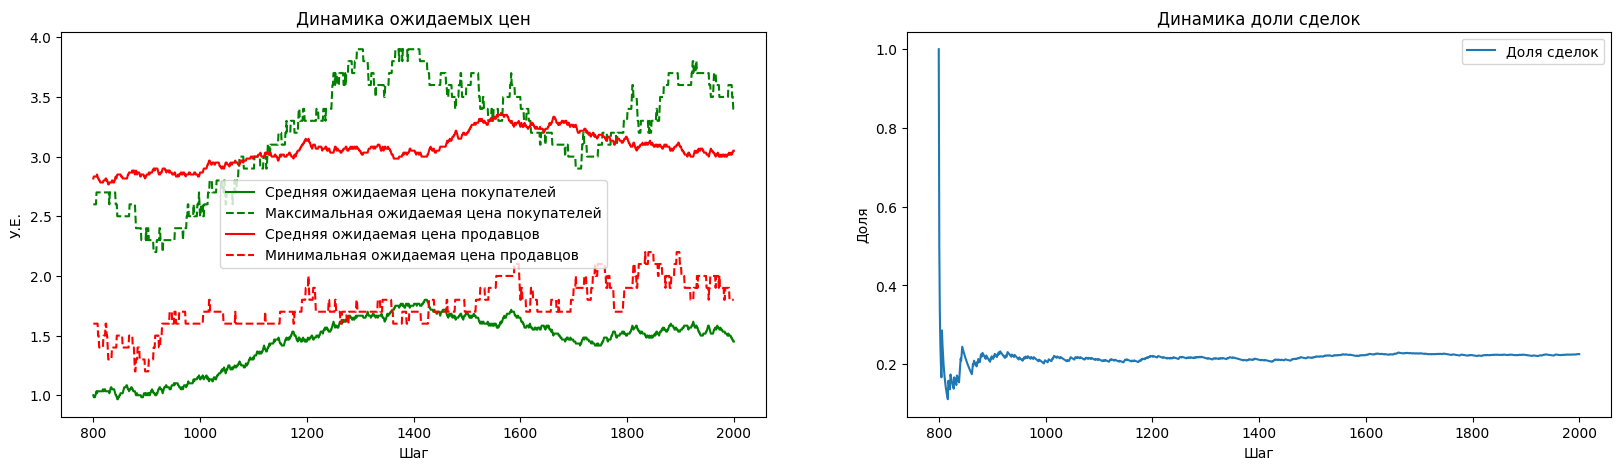

In [73]:
model_2.plot_dynamics(0, 2000)
model_2.plot_dynamics(0, 200)
model_2.plot_dynamics(800, 2000)

Разнообразие групп продавцов и покупателей оказывает сложное и значительное влияние на динамику рынка. 

Если на рынке есть покупатели, которые строго придерживаются своих ожидаемых цен, то е рыночная динамика может подвергнуться существенному сокращению: продавцы, сталкиваясь с такими покупателями, вынуждены снижать свои цены, что приводит к падению минимальной ожидаемой цены продавцов на рынке. Из-за этого снижается также количество успешных сделок и уменьшению объема транзакций на рынке. 

Также наличие разных групп покупателей и продавцов с разными диапазонами цен увеличивает разнородноость рынка: появляются множество пар, которые изначально не смогут договориться ни в каком случае, что вызывает рост количества неудачных сделок (становится больше красных связей на диаграмме). Замедляются темпы доли сделок на рынке, так как становится труднее договориться со всеми и прийти к равновесию.


Таким образом, можно сделать вывод, что разнообразие групп продавцов и покупателей оказывает значительное и сложное влияние на динамику рынка, может вызывать сокращение объема сделок, уменьшение количества успешных транзакций, а также увеличение разнородности рынка и количество неудачных сделок. В свою очередь, это приводит к замедлению темпов доли сделок на рынке и затруднению достижения равновесия.

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день. 
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [74]:


def mean(lst):
    return sum(lst) / len(lst)


class Model_3:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min,
                 seller_max, seller_delta, max_connections):

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta, i) for i in range(num_of_sellers)]
        # другой массив, который будет хранить данные, чтобы их потом восстановить
        self.sellers_archive = []
        self.consumers_expect_price = []
        self.sellers_expect_price = []
        self.num_of_sellers_start = self.num_of_sellers

        self.max_connections = max_connections

        self.deals_results = []

    def deal(self, consumer_id, seller_id):
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        if (len(self.sellers) != 0):
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        if (len(self.sellers_archive) != 0):
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers_archive])
        

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 1
            })
            
            self.consumers[consumer_id].decrease_expect_price()
            self.sellers[seller_id].increase_expect_price()
            # изменяем данные и у другого массива
          

            # уменьшение количества товара
            self.sellers[seller_id].quantity -= 1

            # если у продавца закончился товар, то удаляем его и из массива ожидаемых цен тоже
            if self.sellers[seller_id].quantity == 0:
                self.sellers_archive.append(self.sellers[seller_id])
                self.sellers.pop(seller_id)
                # уменьшение количества продавцов
                self.num_of_sellers -= 1
                


        else:
            # Сделка не состоялась

            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 0
            })
            self.consumers[consumer_id].increase_expect_price()
            self.sellers[seller_id].decrease_expect_price()
            

    def run(self, num_of_steps):
        for i in trange(num_of_steps + 1):
            # если день закончился, то обновляем запасы до первоначального количества
            if (i % self.max_connections) == 0:
                
                #self.sellers.append([self for seller in self.sellers_archive])
                #if (len(self.sellers_archive) != 0):
                for seller_id in range(len(self.sellers_archive)):
                    self.sellers.append(self.sellers_archive[seller_id]) 
                                         
                self.sellers_archive.clear()

                for seller in self.sellers:
                    seller.quantity = seller.start_quantity
                
                    
                self.num_of_sellers = self.num_of_sellers_start

            consumer_id = random.randrange(0, self.num_of_consumers)
            
            if (self.num_of_sellers != 0):
                seller_id = random.randrange(0, self.num_of_sellers)
                self.deal(consumer_id, seller_id)
            else:
                self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
                self.sellers_expect_price.append([seller.expect_price for seller in self.sellers_archive])
                self.deals_results.append({
                  'consumer_id': consumer_id,
                  'seller_id': 0,
                  'result': 0
                })
                self.consumers[consumer_id].increase_expect_price()



    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize=(20, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # Список точек по оси шагов
        steps_range = list(range(start, end + 1))
        ax1.set_title("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start: end + 1])), color='g',
                 label="Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start: end + 1])), color='g', linestyle='--',
                 label="Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start: end + 1])), color='r',
                 label="Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start: end + 1])), color='r', linestyle='--',
                 label="Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end + 1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.set_title("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random() * (consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, id):
        self.min_price = seller_min + random.random() * (seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.quantity = id + 5
        self.start_quantity = self.quantity

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


num_of_consumers = 3
num_of_sellers = 3
consumer_min_price = 3
consumer_max_price = 4
consumer_delta = 0.1
seller_min_price = 1
seller_max_price = 2
seller_delta = 0.1

max_connections = 200

model_3 = Model_3(num_of_consumers, num_of_sellers, consumer_min_price, consumer_max_price, consumer_delta,
                seller_min_price,
                seller_max_price, seller_delta, max_connections)
model_3.run(1000)


100%|██████████| 1001/1001 [00:00<00:00, 249895.74it/s]


100%|██████████| 1001/1001 [00:00<00:00, 191284.26it/s]


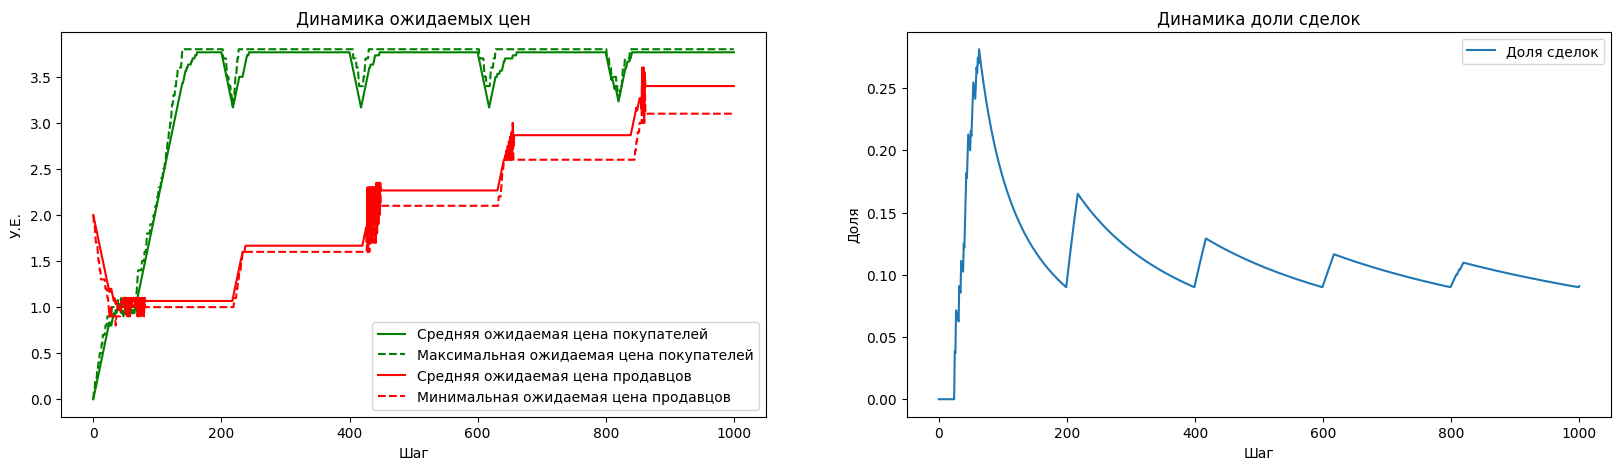

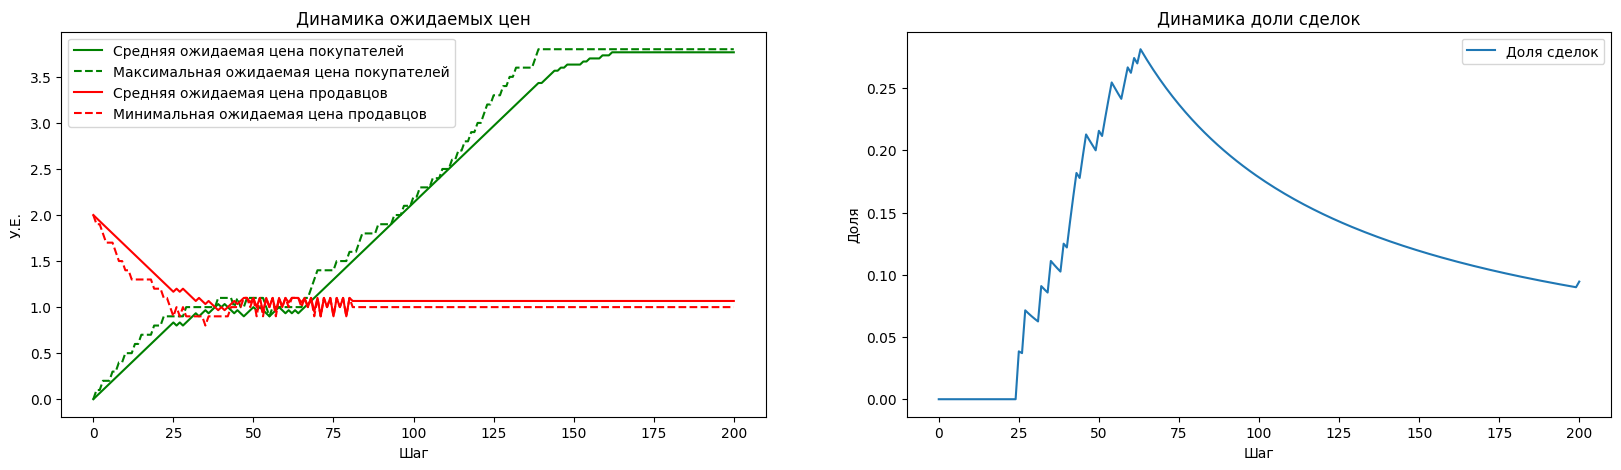

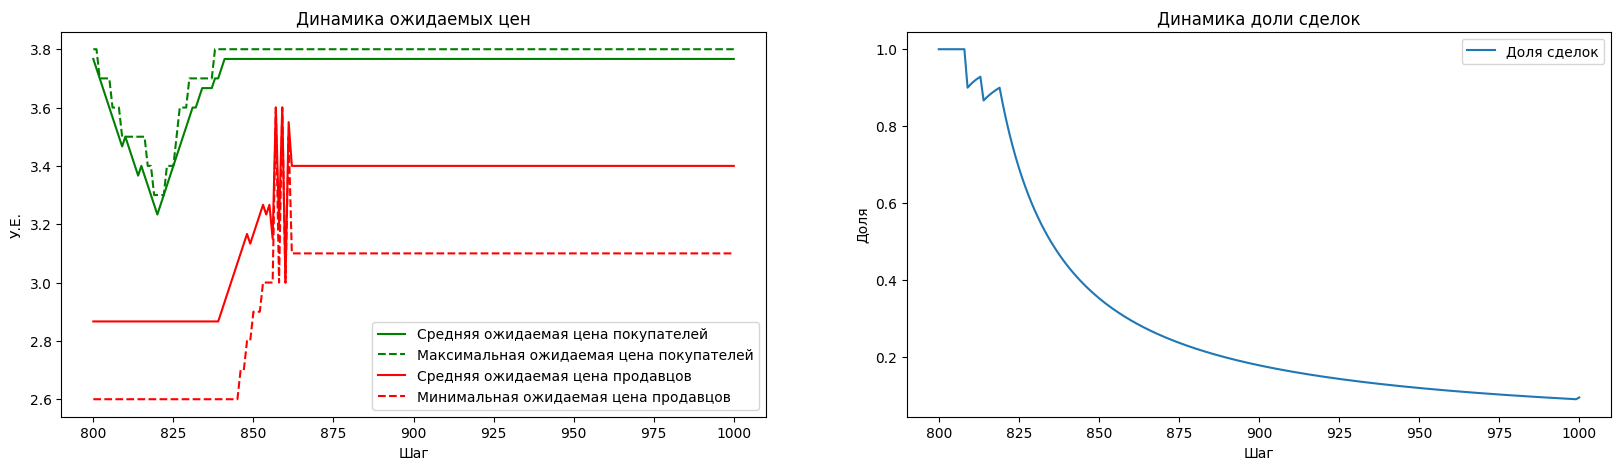

In [75]:

model_3.run(1000)
model_3.plot_dynamics(0, 1000)
model_3.plot_dynamics(0, 200)
model_3.plot_dynamics(800, 1000)


Ограничение количества товара, доступного для продажи продавцами в течение дня, оказывает сильное влияние на динамику рынка, отражаемую на графиках и статистических показателях. Ближе к завершению дня наблюдаются заметные спады в торговой активности, поскольку большинство продавцов исчерпывают свой товарный запас и перестают участвовать в сделках. В результате темпы торговли также существенно снижаются.

Графики и данные рынка ясно демонстрируют эти проседания, которые происходят в конце торгового дня. Отчётливо видны проседания рынка в концах каждого дня.
По мере приближения к концу дня эти ограничения становятся все более ощутимыми, так как всё больше продавцов уже исчерпали свои запасы и ушли с рынка.


Однако, я реализовала модель таким образом, что в ситуациях, когда с рынка ушли все продавцы из-за нехватки товара, ожидаемые цены у покупателей растут, так как из-за дефицита они готовы предложить большее количество денег. Поэтому в начале нового дня сделки проходят довольно активно (из-за поднявшихся ожидаемых цен покупателей).

Но дефицит всё же сильно снижает оборот и интенсивность торговли. Потенциальные сделки не осуществляются из-за недостатка доступных товаров, что ведет к заметному спаду рыночной активности. Видно, что реализовывается не весь потенциал рынка.

Таким образом, явные проседания в рыночной активности в конце дня, вызванные ограничениями количества доступного товара, подчеркивают важность эффективного управления предложением и запасами товаров. 


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

Модификация модели: Влияние рекламы на рыночные сделки

Цель модификации: Исследовать влияние рекламной активности фирм на поведение покупателей и объем сделок на рынке.

Описание модели:

Добавление рекламной активности фирм: Каждая фирма имеет возможность запускать рекламные кампании для своего товара. Реклама предлагает клиентам использовать специальный промокод для получения скидки на покупку товара.
Вероятность просмотра рекламы: Вероятность просмотра рекламы зависит от склонности покупателя к покупкам и их уверенности в эффективности рекламы. Чем выше склонность к покупкам и вера в рекламу, тем выше вероятность просмотра.
Влияние рекламы на поведение покупателей: Покупатели, просмотревшие рекламу и убедившиеся в ее эффективности, могут быть склонны к более активным покупкам или поиску товаров с использованием промокода.
Расчет объема сделок: Объем сделок будет отражать количество покупок, совершенных с использованием промокодов.

Да, представленный код отражает модификацию модели, которая учитывает влияние рекламы на рыночные сделки. В этой модификации компании запускают рекламу своего продукта, включающую специальные промокоды, по которым клиенты могут получить скидку. Каждый человек с некоторой вероятностью увидит рекламу, и в зависимости от своей личной склонности к покупкам принимает решение о покупке товара по скидке.

Модификация включает логику просмотра рекламы покупателями на основе их склонности к покупкам и веры в рекламу. Если склонность к покупкам высокая и вера в рекламу сильная, покупатель просматривает рекламу и может воспользоваться промокодом для покупки товара со скидкой. Если склонность к покупкам низкая и вера в рекламу слабая, покупатель пропускает рекламу и не использует промокод.

Предложенная модификация позволяет рассмотреть влияние рекламы на поведение покупателей и результаты рыночных сделок.

**Модель заключается в том,** что в ней существует две группы продавцов: одни привлекают внимание рекламными кампаниями, а другие - нет. Покупатели же обладают некой чувствительностью к рекламе (она присваевается рандомным образом). 

Каждый покупатель дорожит своим временем, поэтому он готов идти только к ближайшему продавцу. Однако, если покупатель обладает чувствительностью к рекламе, то он из-за большей лояльности к бренду постарается найти фирму, которая рекламировалась (и вне зависимости от цены пойдёт именно туда). Но если среди двух ближайших фирм не нашлось той, которая запускала рекламную кампанию, то покупателю придётся пробовать купить товар у обычной фирмы.

Если сделка проводится между покупателем, чувствительным к рекламе, и продавцом, запустившем рекламу, то цена продавца падает на фиксированный процент, который даёт промокод на рекламе. Ожидаемая цена продавца после такой сделки никак не изменится, потому что она продала товар по меньшей цене. При удачной сделке ожидаемая цена покупателя тоже никак не меняется, но, если сделка не удалась даже по промокоду, то ожиаемая цена покупателя растёт.

Если же покупатель не является чувствительным к рекламе, то он обращается к ближайшему продавцу, которого он нашёл без каких-либо предпочтений.

Такая модель демонстрирует сложную взаимосвязь между рекламными кампаниями, покупателями и продавцами, где реклама играет решающую роль в выборе потребителей, а также может влиять на ценовую конкуренцию среди продавцов.

In [87]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов
def mean(lst):
    return sum(lst) / len(lst)


class Model_4:
    def __init__(self, num_of_consumers, consumer_min, consumer_max, consumer_delta, seller_groups, sale):

        # количество групп покупателей
        self.num_of_consumers = num_of_consumers
        # cписок покупателей
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # количество групп продавцов
        self.seller_groups = seller_groups
        self.num_of_seller_groups = len(seller_groups)
        self.num_of_sellers = 0
        self.sellers = []

        # список всех продавцов
        for group_params in seller_groups:
            # seller_group = []
            num_of_sellers_per_group = group_params['num_of_sellers_per_group']
            seller_min = group_params['seller_min']
            seller_max = group_params['seller_max']
            seller_delta = group_params['seller_delta']
            using_ad = group_params['using_ad']

            self.num_of_sellers += num_of_sellers_per_group
            self.sellers.extend(
                [Seller(seller_min, seller_max, seller_delta, using_ad) for _ in range(num_of_sellers_per_group)])

        self.consumers_expect_price = []
        self.sellers_expect_price = []
        self.deals_results = []
        self.deal_price = []
        self.last_price = 0

    def deal(self, consumer_id, seller_id_1, seller_id_2):
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        # если человек восприимчив к рекламе и есть фирма, которая запустила рекламу, то человек пойдёт туда
        if self.consumers[consumer_id].ad_request == 1:
            if self.sellers[seller_id_1].using_ad == 1:
                if (self.sellers[seller_id_1].expect_price * (1 - sale / 100)) <= \
                        self.consumers[consumer_id].expect_price:
                    # Сделка состоялась


                    # Записываем факт состоявшейся сделки
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_1,
                        'result': 1
                    })
                    self.last_price = ((self.sellers[seller_id_1].expect_price * (1 - sale / 100))+self.consumers[consumer_id].expect_price)/2
                    self.deal_price.append(self.last_price)
              
                    # Данные продавец и покупатель оставляют expect_price на том же уровне, так как сделка была проведена по скидке
                    
                else:
                # Сделка не состоялась

                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_1,
                        'result': 0
                    })
                    self.deal_price.append(self.last_price)

                    # Данный продавец оставляет expect_price на том же уровне, так как он продавал по скидке

                    self.consumers[consumer_id].increase_expect_price()

            elif self.sellers[seller_id_2].using_ad == 1:
                if (self.sellers[seller_id_2].expect_price * ( 1 -  sale / 100)) <= \
                    self.consumers[consumer_id].expect_price:
                    # Сделка состоялась

                    # Записываем факт состоявшейся сделки
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_2,
                        'result': 1
                    })
                    self.last_price = ((self.sellers[seller_id_2].expect_price * (1 - sale / 100))+self.consumers[consumer_id].expect_price)/2
                    self.deal_price.append(self.last_price)
                    # Данные продавец и покупатель оставляют expect_price на том же уровне, так как сделка была проведена по скидке
                    
                else:
                    # Сделка не состоялась
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_2,
                        'result': 0
                    })

                    self.deal_price.append(self.last_price)

                    # Данный продавец оставляет expect_price на том же уровне, так ка он продавал по скидке

                    self.consumers[consumer_id].increase_expect_price()

            else:
            # если покупатель не восприимчив к рекламе, то он идёт к первому попавшемуся продавцу
            # или он восприимчив к рекламе, но не смог найти фирму, которая рекламировалась
                if self.sellers[seller_id_1].expect_price <= self.consumers[consumer_id].expect_price:
                    # Сделка состоялась

                    # Записываем факт состоявшейся сделки
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_1,
                        'result': 1
                    })
                    self.last_price = (self.sellers[seller_id_1].expect_price + self.consumers[consumer_id].expect_price)/2
                    self.deal_price.append(self.last_price)
                    # Данный покупатель решает уменьшить у себя expect_price
                    self.consumers[consumer_id].decrease_expect_price()

                    # Данный продавец решает увеличить у себя expect_price
                    self.sellers[seller_id_1].increase_expect_price()
                else:
                # Сделка не состоялась
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id_1,
                        'result': 0
                    })
                    self.deal_price.append(self.last_price)
                    # Данный продавец решает уменьшить у себя expect_price
                    self.sellers[seller_id_1].decrease_expect_price()

                    # Данный покупатель решает увеличить expect_price
                    self.consumers[consumer_id].increase_expect_price()
        else:
          # если покупатель не восприимчив к рекламе, то он идёт к первому попавшемуся продавцу
          # или он восприимчив к рекламе, но не смог найти фирму, которая рекламировалась
            if self.sellers[seller_id_1].expect_price <= self.consumers[consumer_id].expect_price:
                  # Сделка состоялась

                  # Записываем факт состоявшейся сделки
                self.deals_results.append({
                    'consumer_id': consumer_id,
                    'seller_id': seller_id_1,
                    'result': 1
                })
                self.last_price = (self.sellers[seller_id_1].expect_price + self.consumers[consumer_id].expect_price)/2
                self.deal_price.append(self.last_price)
                  # Данный покупатель решает уменьшить у себя expect_price
                self.consumers[consumer_id].decrease_expect_price()

                  # Данный продавец решает увеличить у себя expect_price
                self.sellers[seller_id_1].increase_expect_price()
            else:
              # Сделка не состоялась
                self.deals_results.append({
                    'consumer_id': consumer_id,
                    'seller_id': seller_id_1,
                    'result': 0
                })
                self.deal_price.append(self.last_price)
                  # Данный продавец решает уменьшить у себя expect_price
                self.sellers[seller_id_1].decrease_expect_price()

                  # Данный покупатель решает увеличить expect_price
                self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        for _ in trange(num_of_steps + 1):  # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индексы двух продавцов (далее покупатель будет выбирать, к какому он пойдёт)
            seller_id_1 = random.randrange(0, self.num_of_sellers)
            seller_id_2 = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id_1, seller_id_2)


    def plot_dynamics(self, start, end, name = ""):
        fig = plt.figure(figsize=(20, 5))
        fig.suptitle(name)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # Список точек по оси шагов
        steps_range = list(range(start, end + 1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start: end + 1])), color='g',
                label="Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start: end + 1])), color='g', linestyle='--',
                label="Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start: end + 1])), color='r',
                label="Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start: end + 1])), color='r', linestyle='--',
                label="Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end + 1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")


    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count': 0,
                    'negative_count': 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end + 1):

            if self.deals_results[i]['result'] == 0:  # Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(self.consumers[consumer_id].ad_request), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(self.sellers[seller_id].using_ad), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10 * x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth=get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth=get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph
    
    def price_plot(self, start, finish, name = ""):
        steps_range = list(range(start, finish + 1))
        deals_price = []

        for k in range(start, finish + 1):
            deals_price.append(self.deal_price[k])
        
        plt.figure(figsize=(10, 6))
        plt.suptitle(name)
        plt.plot(steps_range, deals_price)
        plt.xlabel('Шаг')
        plt.ylabel('Цена сделки')
        plt.title('График цены сделок')
        plt.show()



class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random() * (consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        # действует реклама на покупателя или нет. Рекламы довольно эффективные, поэтому люди скорее будут доверяться им
        self.ad_request = random.choices([0, 1], weights=[2, 8])[0]



    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, using_ad):
        self.min_price = seller_min + random.random() * (seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.using_ad = using_ad

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


# две группы продавцов: одни запускают рекламу(1) и дают скидки, другие - нет (0)
seller_groups = [
    {'num_of_sellers_per_group': 2, 'seller_min': 1, 'seller_max': 2, 'seller_delta': 0.1, 'using_ad': 0},
    {'num_of_sellers_per_group': 11, 'seller_min': 1, 'seller_max': 2, 'seller_delta': 0.1, 'using_ad': 1},

]

random.seed(42)
num_of_consumers = 10
consumer_min = 3
consumer_max = 4
consumer_delta = 0.1
# скидка по промокоду в процентах
sale = 70

model_4 = Model_4(num_of_consumers, consumer_min, consumer_max, consumer_delta, seller_groups, sale)
model_4.run(2000)


100%|██████████| 2001/2001 [00:00<00:00, 181415.00it/s]


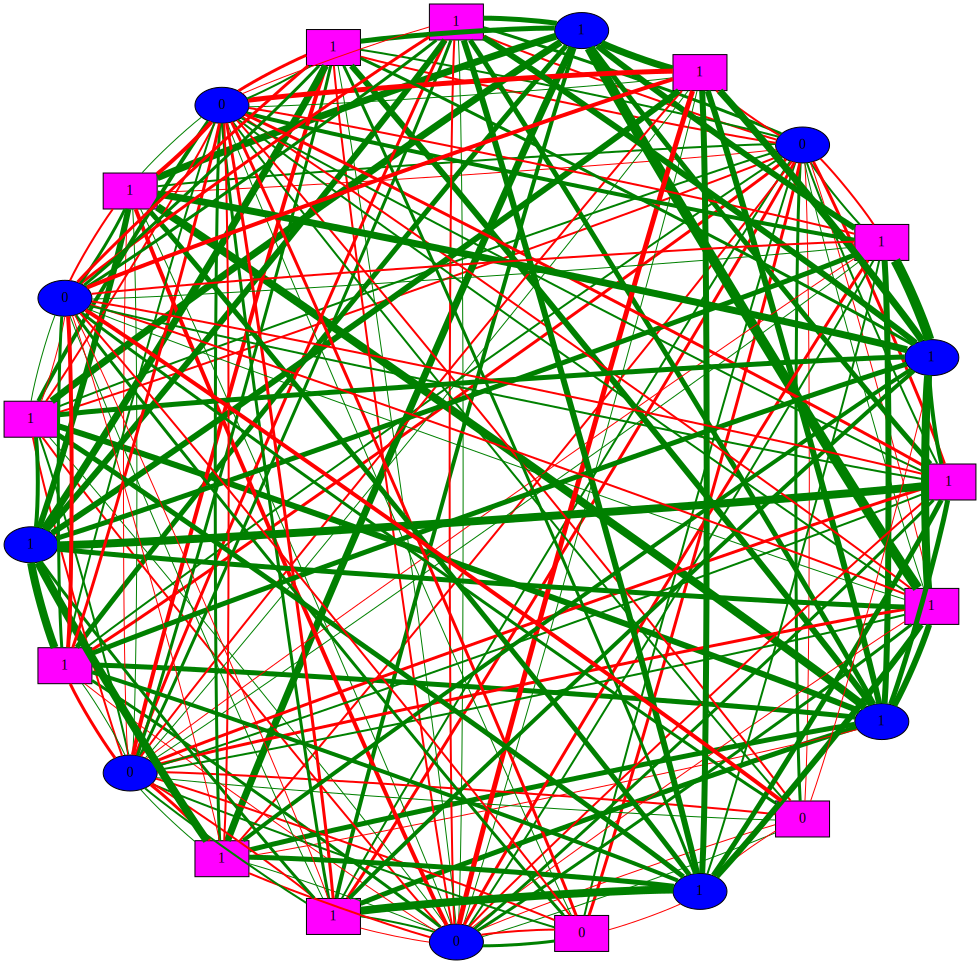

In [86]:
model_4.plot_graph(0, 2000)
#в узлах у покупателей 1, если они реагируют на рекламу (и 0 иначе), а у продавцов - 1, если те рекламируются (и 0 иначе)

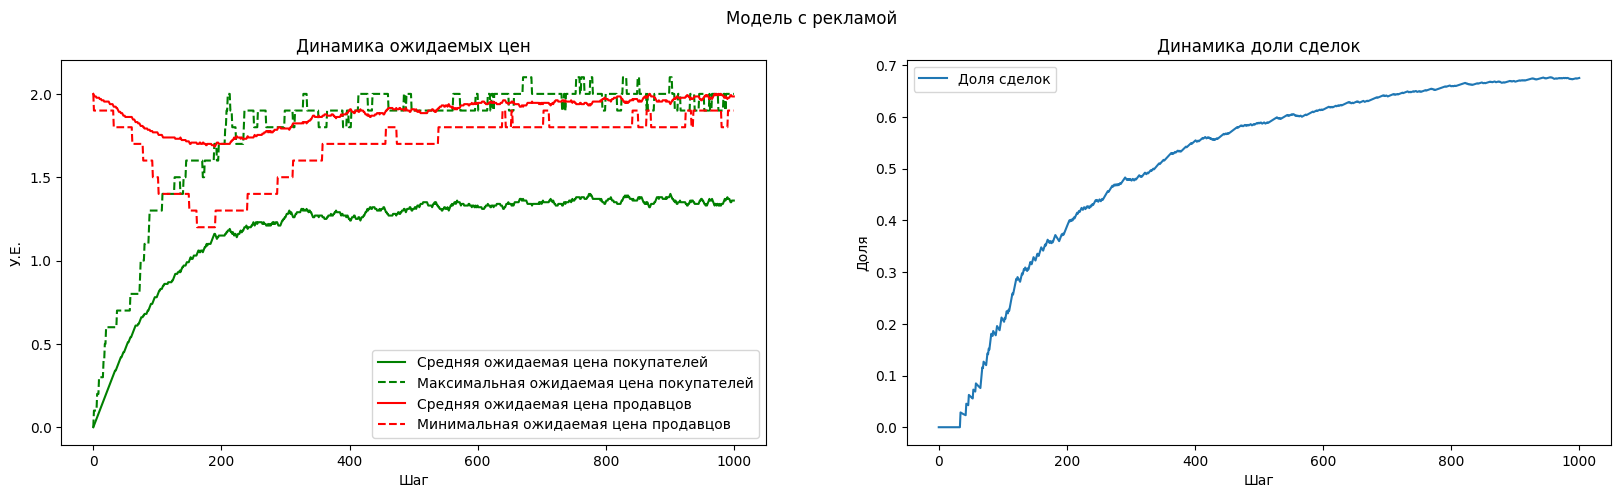

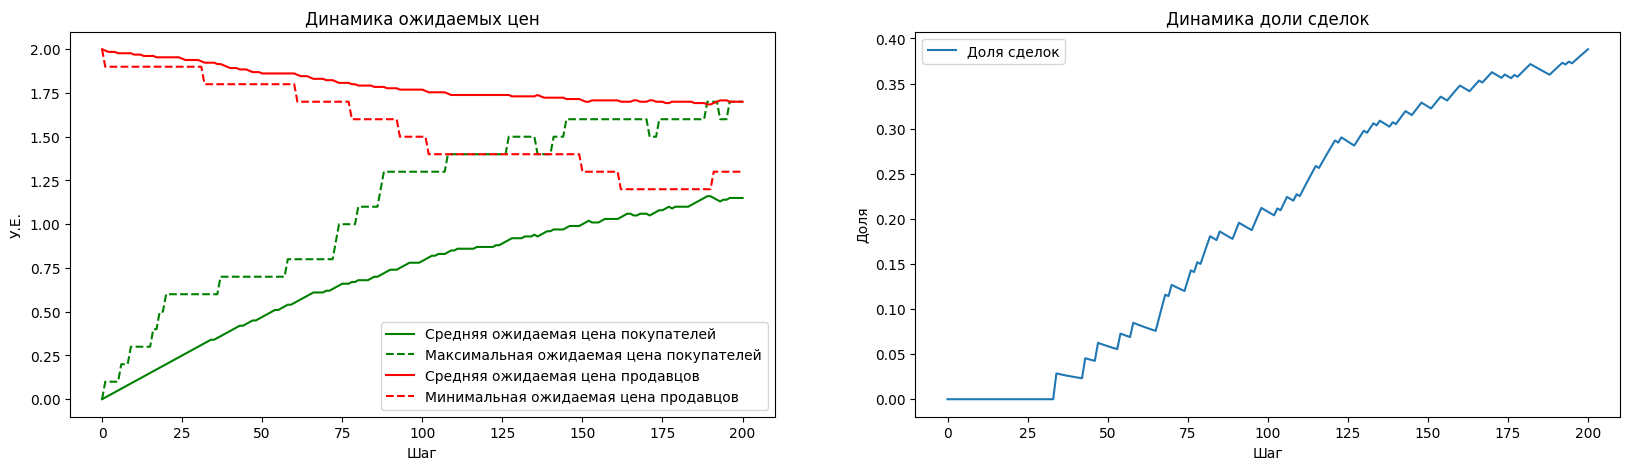

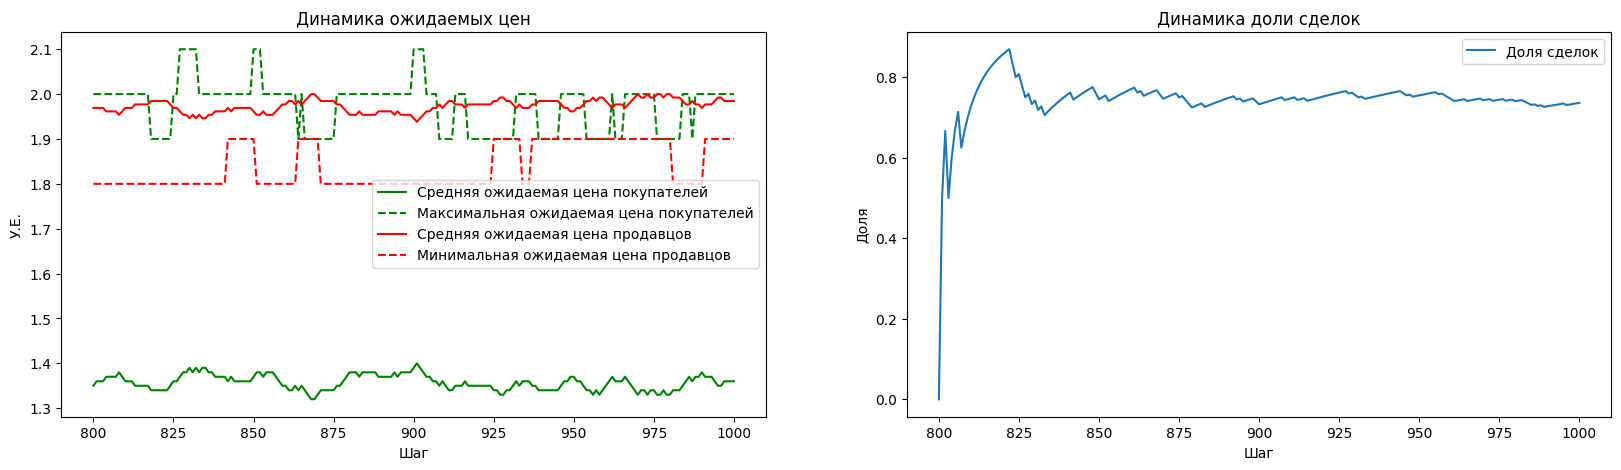

In [81]:
model_4.plot_dynamics(0, 1000, "Модель с рекламой")
model_4.plot_dynamics(0, 200)
model_4.plot_dynamics(800, 1000)

100%|██████████| 2001/2001 [00:00<00:00, 105212.51it/s]


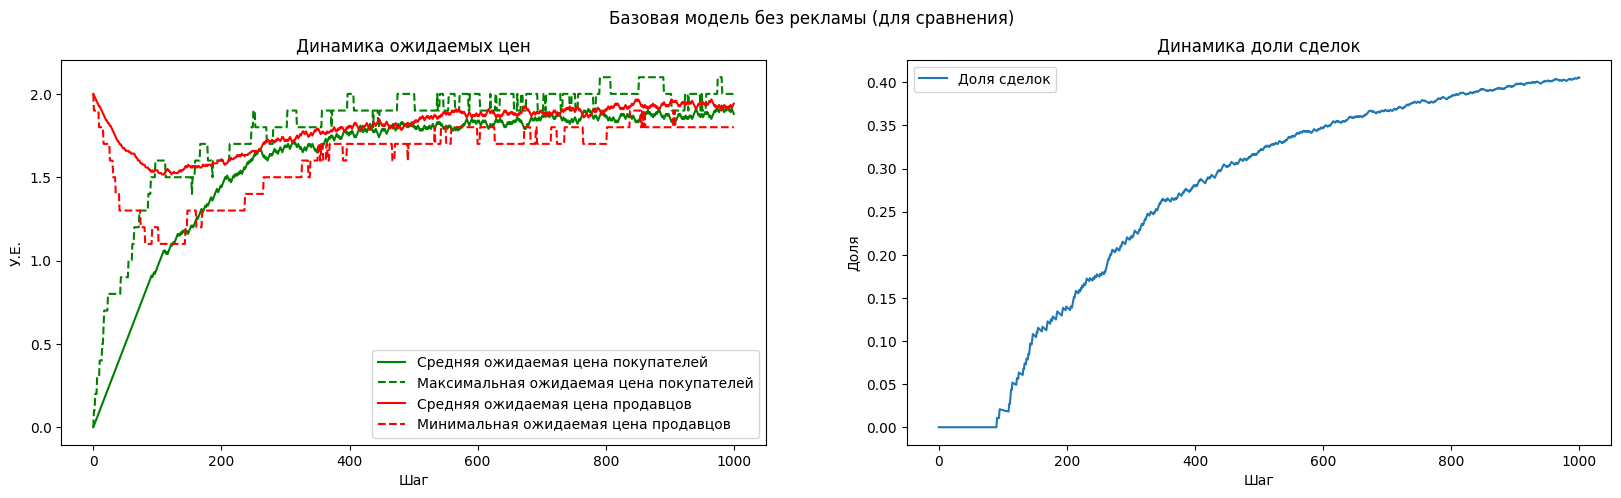

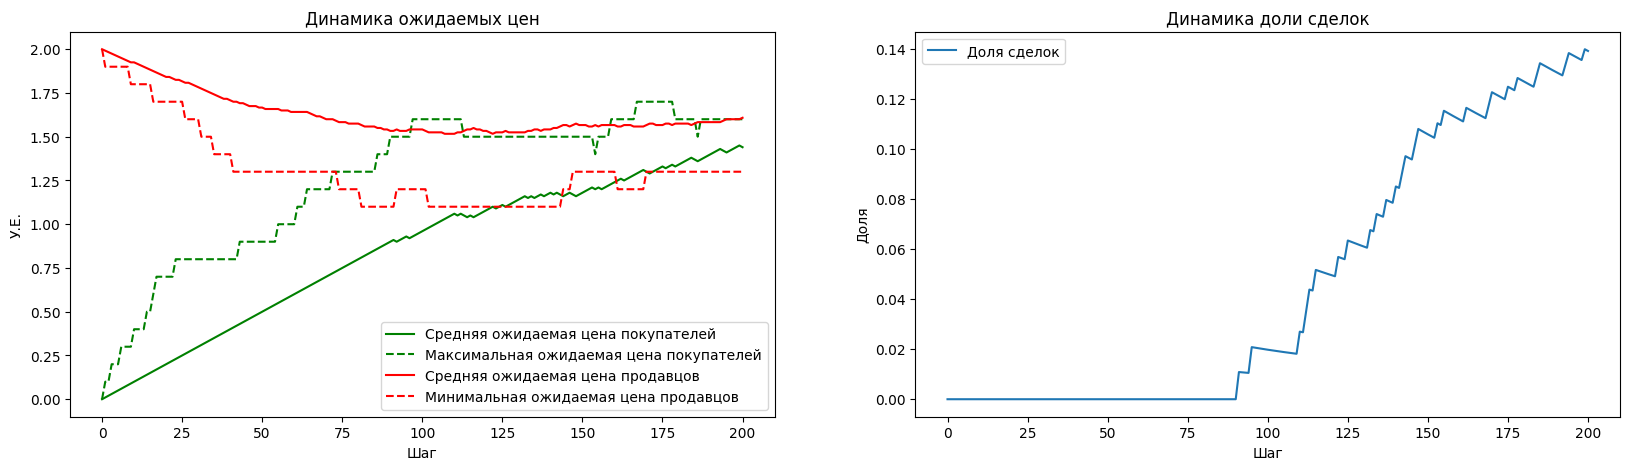

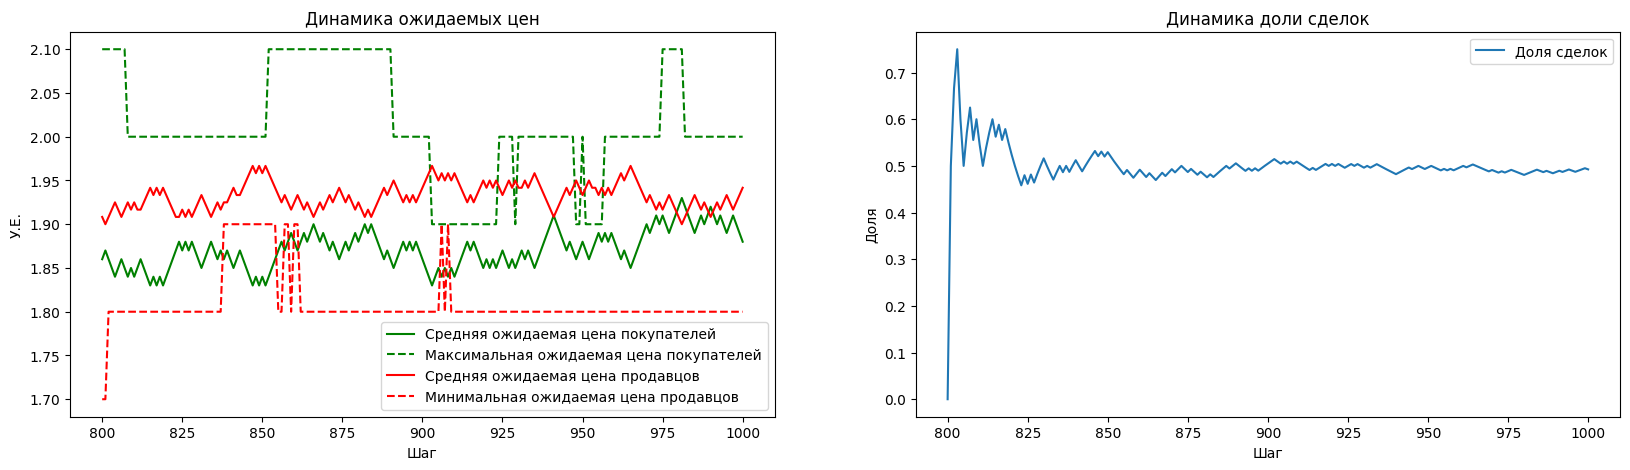

In [79]:
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



random.seed(42)
model = Model_first(num_of_consumers=10,
              num_of_sellers=12,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=1,
              seller_max=2,
              seller_delta=0.1)
model.run(2000)
model.plot_dynamics(0, 1000, "Базовая модель без рекламы (для сравнения)")
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

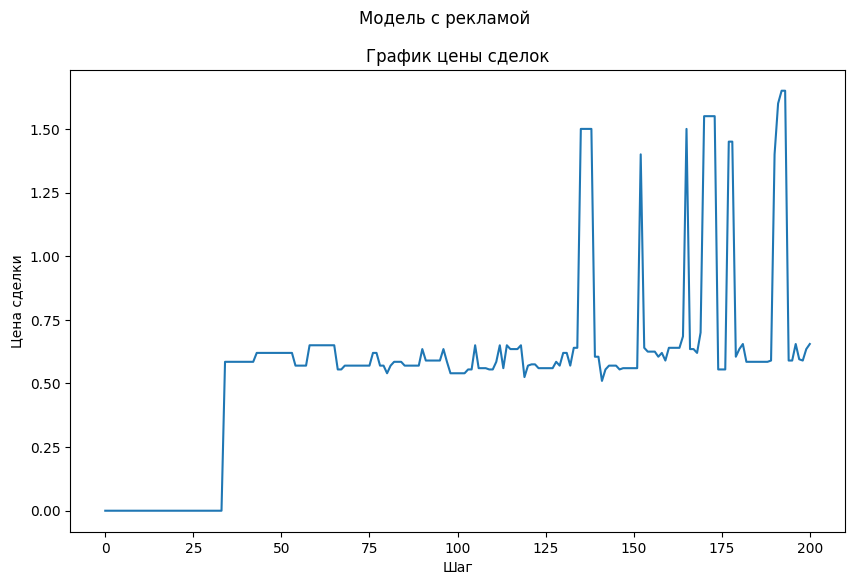

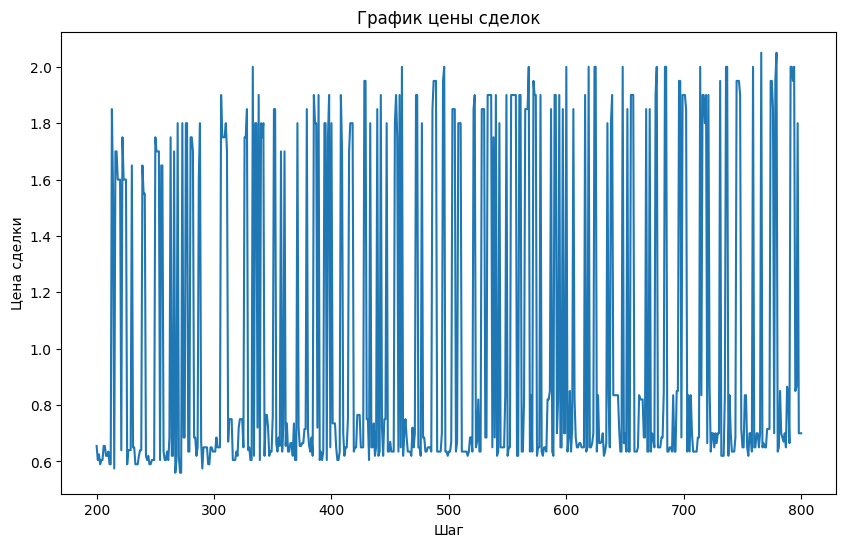

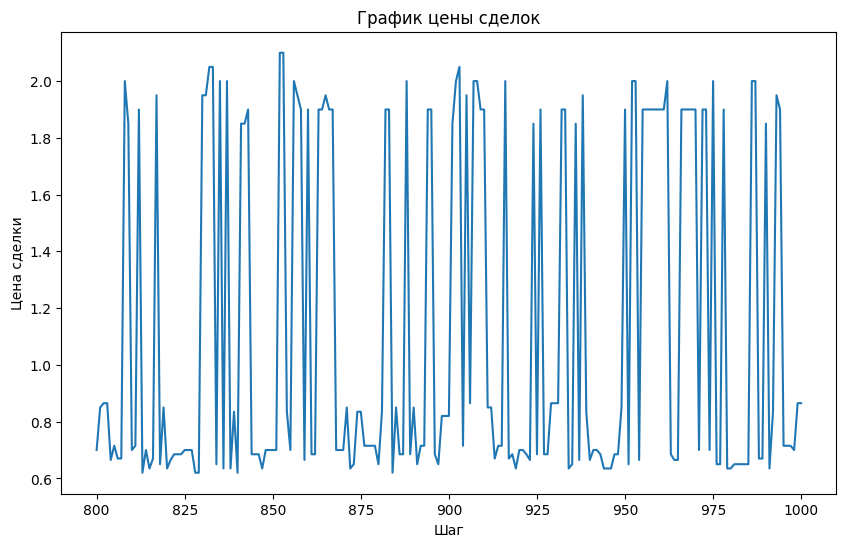

In [90]:
#новая модель
model_4.price_plot(0, 200, "Модель с рекламой")
model_4.price_plot(200, 800)
model_4.price_plot(800, 1000)

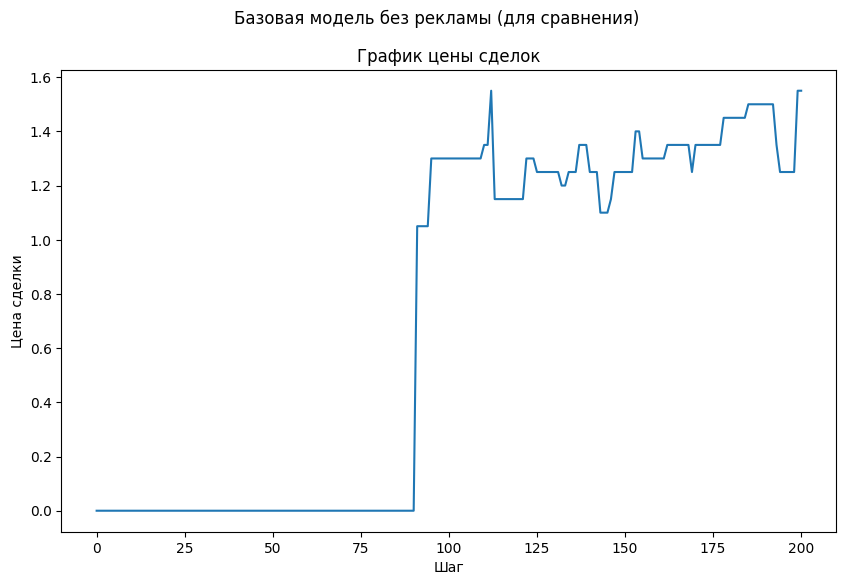

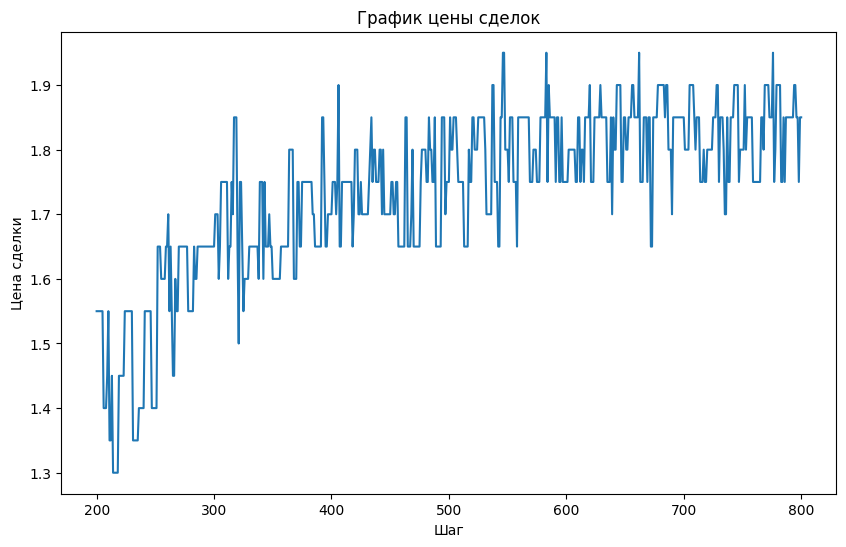

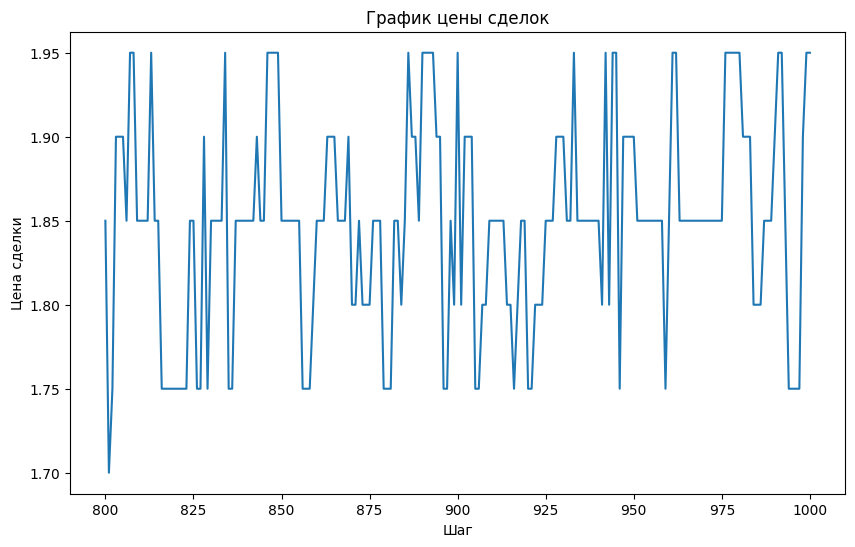

In [91]:
#старая модель
model.price_plot(0, 200, "Базовая модель без рекламы (для сравнения)")
model.price_plot(200, 800)
model.price_plot(800, 1000)

На графиках можно видеть реализацию двух моделей: в первой модели присутствуют продавцы, осуществляющие рекламные кампании, и продавцы, не занимающиеся рекламой, вторая модель же базовая и в ней отсутсвуют рекламные кампании.

Итак, проанализируем полученные результаты. Очевидно, что реклама позволила увеличить темпы динамики доли сделок. Это происходит из-за того, что реклама позволяет большему количеству пар договориться из-за понижения цены продавца по промокоду.

Снизилась ожидаемая средняя цена покупателя, так как стало происходить большее количество сделок по промокодам, что не вызывает рост ожидаемой цены у участников сделки.

Графики цен на сделки также наглядно демонстрируют, что на рынке с рекламными кампаниями происходит множество сделок по низкой (акционной цене), что и увеличивает количество сделок и степень вовлеченности на рынке.


Таким образом, проведенный анализ подтверждает положительное влияние рекламных активностей на долю сделок и общую активность на рынке.